# H0 ==> GDP/C ∝ Economic freedom

This notebook is an exploratory data analysis attempt at economic freedom. Using the 2021 Heritage Economic Freedom Index.
Found at: https://www.heritage.org/index/explore

In [1]:
import typing
import re
import pandas as pd
pd.set_option("display.max_rows", None, "display.max_columns", None)
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline
import warnings
warnings.simplefilter(action='ignore')

In [2]:
df = pd.read_csv('econ_freedom_index.csv')

In [3]:
df.head()

,CountryID,Country Name,WEBNAME,Region,World Rank,Region Rank,2021 Score,Property Rights,Judical Effectiveness,Government Integrity,Tax Burden,Gov't Spending,Fiscal Health,Business Freedom,Labor Freedom,Monetary Freedom,Trade Freedom,Investment Freedom,Financial Freedom,Tariff Rate (%),Income Tax Rate (%),Corporate Tax Rate (%),Tax Burden % of GDP,Gov't Expenditure % of GDP,Country,Population (Millions),"GDP (Billions, PPP)",GDP Growth Rate (%),5 Year GDP Growth Rate (%),GDP per Capita (PPP),Unemployment (%),Inflation (%),FDI Inflow (Millions),Public Debt (% of GDP)
0,1,Afghanistan,Afghanistan,Asia-Pacific,146.0,33.0,53.0,30.3,25.7,29.1,91.1,76.1,99.9,53.9,59.9,80.8,68.6,10.0,10.0,5.7,20.0,20.0,9.3,28.2,Afghanistan,38.0,$76.60,3.0,2.3,"$2,294",11.1,2.3,38.5,7.3
1,2,Albania,Albania,Europe,66.0,35.0,65.2,46.1,22.8,40.6,89.0,74.6,86.6,66.1,51.6,82.0,82.8,70.0,70.0,3.6,23.0,15.0,18.6,29.1,Albania,2.9,$39.80,2.2,3.1,"$14,495",12.3,1.4,"1,281.30",68.8
2,3,Algeria,Algeria,Middle East and North Africa,162.0,13.0,49.7,34.0,41.6,32.7,67.2,55.4,49.1,63.5,51.3,84.3,57.4,30.0,30.0,13.8,35.0,26.0,37.2,38.5,Algeria,43.1,$668.80,0.7,2.1,"$11,820",11.7,2.0,"1,381.90",46.3
3,4,Angola,Angola,Sub-Saharan Africa,140.0,30.0,54.2,30.3,22.8,20.4,87.3,86.9,77.9,56.9,59.6,67.5,70.2,30.0,40.0,7.4,17.0,30.0,9.2,20.9,Angola,31.8,$200.80,-1.5,-0.9,"$6,930",6.9,17.1,"-4,098.50",109.8
4,5,Argentina,Argentina,Americas,148.0,26.0,52.7,46.1,45.7,54.0,70.4,52.8,38.4,59.5,46.3,41.9,62.6,55.0,60.0,13.7,35.0,30.0,28.9,39.6,Argentina,44.9,$911.60,-2.2,-0.3,"$22,947",9.8,53.5,"6,244.40",88.7


In [4]:
df.info() #To see how I should clean up the data before analysing

#Problem #0 = CountryID column is redundant, drop, I'll drop other object columns too given that isn't meaningful data
#Problem #1 = 3 columns with same, info, redundant, I'll drop them.
#Problem #2 = GDP and GDP/C, FDI should be float not objects so needs to be converted to float
#Problem #3 = Null values, lowest colum is 178/184, so I'll drop those rows, not going to lose much information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 184 entries, 0 to 183
Data columns (total 34 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CountryID                    184 non-null    int64  
 1   Country Name                 184 non-null    object 
 2   WEBNAME                      184 non-null    object 
 3   Region                       184 non-null    object 
 4   World Rank                   178 non-null    float64
 5   Region Rank                  178 non-null    float64
 6   2021 Score                   178 non-null    float64
 7   Property Rights              183 non-null    float64
 8   Judical Effectiveness        183 non-null    float64
 9   Government Integrity         183 non-null    float64
 10  Tax Burden                   178 non-null    float64
 11  Gov't Spending               181 non-null    float64
 12  Fiscal Health                181 non-null    float64
 13  Business Freedom    

# Data cleaning

In [5]:
#Solving problem 0 and 1
df = df.drop(['CountryID','WEBNAME','Country','World Rank','Region Rank'], axis = 1)

In [6]:
#Getting rid of null rows, Problem 3
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)

In [7]:
#Convert number objects to float. Some fields are in the form $xxx,xxx,..., who in their right mind inputs data like this?
#Problem 2

unret = lambda v: float(re.sub("[^\d\.]", "", v))

object_list = ['GDP (Billions, PPP)','GDP per Capita (PPP)','FDI Inflow (Millions)']

df[object_list] = df[object_list].astype("string")

for v in object_list:
    df[v] = [unret(i) for i in df[v]]


In [8]:
#To use later
columns = df.columns

# Superficial analysis

count       173.000000
mean      21553.884393
std       22134.535608
min         783.000000
25%        4951.000000
50%       13380.000000
75%       32297.000000
max      121293.000000
Name: GDP per Capita (PPP), dtype: float64


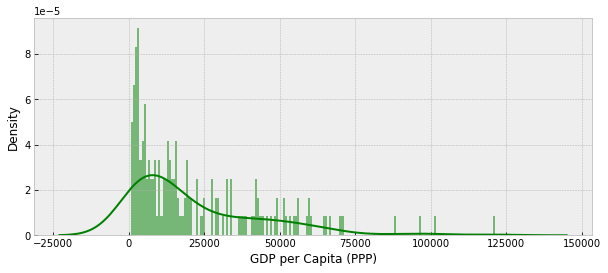

In [9]:
#Lets just look at GDP/Capita
plt.rcParams['figure.figsize'] = [10, 4]
plt.style.use('bmh')
ax = sns.distplot(df['GDP per Capita (PPP)'], color='g', bins=173, hist_kws={'alpha': 0.5});
print(df['GDP per Capita (PPP)'].describe())

Nothing surprising here, most countries are have a very low GDP/C and a few have a very high. Predicting power law distribution based on countries.

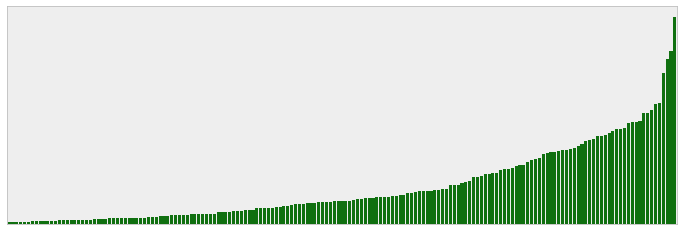

In [10]:
#Let's see if thats true
dfs_gdppc = df.sort_values(by=['GDP per Capita (PPP)'])

plt.rcParams['figure.figsize'] = [12, 4]
ax = sns.barplot(x = 'Country Name',y = 'GDP per Capita (PPP)',data =dfs_gdppc, color = 'g')
ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)

Power law distribution indeed. Matthew Principle in effect.

I think the same will hold true for economic freedom and gdp/c time to test the H0.

count    173.000000
mean      62.224855
std        9.957819
min       24.700000
25%       55.700000
50%       62.100000
75%       69.300000
max       89.700000
Name: 2021 Score, dtype: float64


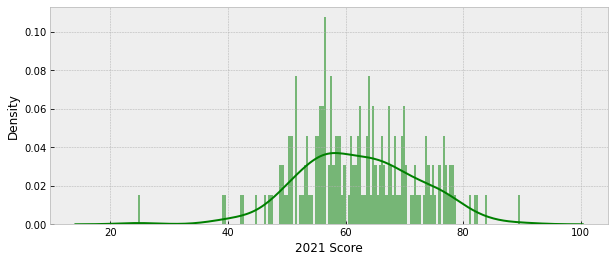

In [11]:
#Lets just look at Freedomindex
plt.rcParams['figure.figsize'] = [10, 4]
plt.style.use('bmh')
ax = sns.distplot(df['2021 Score'], color='g', bins=173, hist_kws={'alpha': 0.5});
print(df['2021 Score'].describe())

r = 0.7286463111880451, p = 6.475597365751887e-30, err = 116.42039587850775


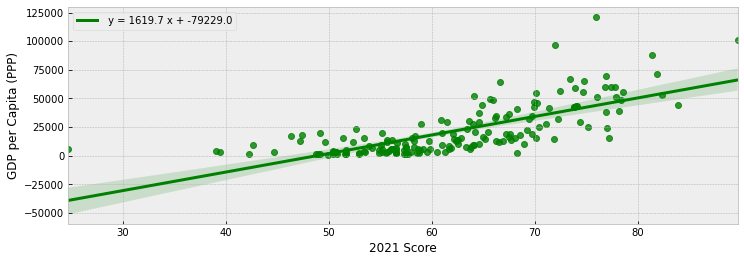

In [12]:
dfs_ef = df.sort_values(by=['2021 Score'])

#linear fit
slope, intercept, r_value, p_value, std_err = stats.linregress(dfs_ef['2021 Score'],dfs_ef['GDP per Capita (PPP)'])

#plot
plt.rcParams['figure.figsize'] = [12, 4]
ax = sns.regplot(x = '2021 Score', y = 'GDP per Capita (PPP)', data = dfs_ef, color = 'g', 
 line_kws = {'label':" y = {0:.1f} x + {1:.1f}".format(slope,intercept)})
ax.legend()

print("r = {}, p = {}, err = {}".format(r_value, p_value, std_err))

Without even removing outliers, on a surperficial analysis, r value is 0.72! This is extremely high by social science standards
where the average r value is ~0.4. Chicken and egg dillema here, even though my conclusion leans very much so on the idea of greater economic freedom = greater economic strength.

Matthew Principle again? 

# Dataset bias check

It seems that some of the overall freedom index is a weighted average of some other fields. Would help if I know which fields the score is biased towards.

In [13]:
#Numerical columns
df_num = df.select_dtypes(include = ['float64', 'int64'])
df_num.head()

,2021 Score,Property Rights,Judical Effectiveness,Government Integrity,Tax Burden,Gov't Spending,Fiscal Health,Business Freedom,Labor Freedom,Monetary Freedom,Trade Freedom,Investment Freedom,Financial Freedom,Tariff Rate (%),Income Tax Rate (%),Corporate Tax Rate (%),Tax Burden % of GDP,Gov't Expenditure % of GDP,Population (Millions),"GDP (Billions, PPP)",GDP Growth Rate (%),5 Year GDP Growth Rate (%),GDP per Capita (PPP),Unemployment (%),Inflation (%),FDI Inflow (Millions),Public Debt (% of GDP)
0,53.0,30.3,25.7,29.1,91.1,76.1,99.9,53.9,59.9,80.8,68.6,10.0,10.0,5.7,20.0,20.0,9.3,28.2,38.0,76.6,3.0,2.3,2294.0,11.1,2.3,38.5,7.3
1,65.2,46.1,22.8,40.6,89.0,74.6,86.6,66.1,51.6,82.0,82.8,70.0,70.0,3.6,23.0,15.0,18.6,29.1,2.9,39.8,2.2,3.1,14495.0,12.3,1.4,1281.3,68.8
2,49.7,34.0,41.6,32.7,67.2,55.4,49.1,63.5,51.3,84.3,57.4,30.0,30.0,13.8,35.0,26.0,37.2,38.5,43.1,668.8,0.7,2.1,11820.0,11.7,2.0,1381.9,46.3
3,54.2,30.3,22.8,20.4,87.3,86.9,77.9,56.9,59.6,67.5,70.2,30.0,40.0,7.4,17.0,30.0,9.2,20.9,31.8,200.8,-1.5,-0.9,6930.0,6.9,17.1,4098.5,109.8
4,52.7,46.1,45.7,54.0,70.4,52.8,38.4,59.5,46.3,41.9,62.6,55.0,60.0,13.7,35.0,30.0,28.9,39.6,44.9,911.6,-2.2,-0.3,22947.0,9.8,53.5,6244.4,88.7


In [14]:
#Let's get the columns with strong correlations with freedom index
df_num_corr = df_num.corr()['2021 Score'][1:] #Ignore itself
strong_corr = df_num_corr[df_num_corr > 0.4].sort_values(ascending=False)
print("There are {} strongly correlated values with freedom index:\n{}".format(len(strong_corr), strong_corr))

There are 11 strongly correlated values with freedom index:
Property Rights          0.889051
Government Integrity     0.833102
Financial Freedom        0.810090
Judical Effectiveness    0.799345
Investment Freedom       0.764010
Business Freedom         0.762624
Trade Freedom            0.745412
GDP per Capita (PPP)     0.728646
Monetary Freedom         0.578361
Labor Freedom            0.500568
Fiscal Health            0.439887
Name: 2021 Score, dtype: float64


I would suppose any field with r > 0.7 or suffixes "freedom" or "integrity" was used as factor in determining the index. 

However PPP is definitely an outlier in that regard, and the fact that PPP and Fiscal Health are so strongly correlated with economic freedom strengtens the H0. 

In [15]:
#Let's get the columns with strong anti correlations with freedom index
df_num_corr = df_num.corr()['2021 Score'][1:] #Ignore itself
strong_corr = df_num_corr[df_num_corr <= 0].sort_values(ascending=False)
print("There are {} strongly anti correlated values with freedom index:\n{}".format(len(strong_corr), strong_corr))

There are 8 strongly anti correlated values with freedom index:
Population (Millions)    -0.059369
Tax Burden               -0.096538
Unemployment (%)         -0.144992
Public Debt (% of GDP)   -0.190881
Gov't Spending           -0.243627
Inflation (%)            -0.291871
Corporate Tax Rate (%)   -0.401608
Tariff Rate (%)          -0.608027
Name: 2021 Score, dtype: float64


It is not entirely obvious to me if anti correlated factors were given any weightage.

Nonetheless something that couldn't have been a part of the weightage is inflation, but is modestly anti correlated, which suggests that economic restrictions increase inflation or vice versa (economic freedoms result in deflation). I would say that hypothesis isn't that far off given the fact the industries that are the most robust have the lowest regulations and are all deflationary.

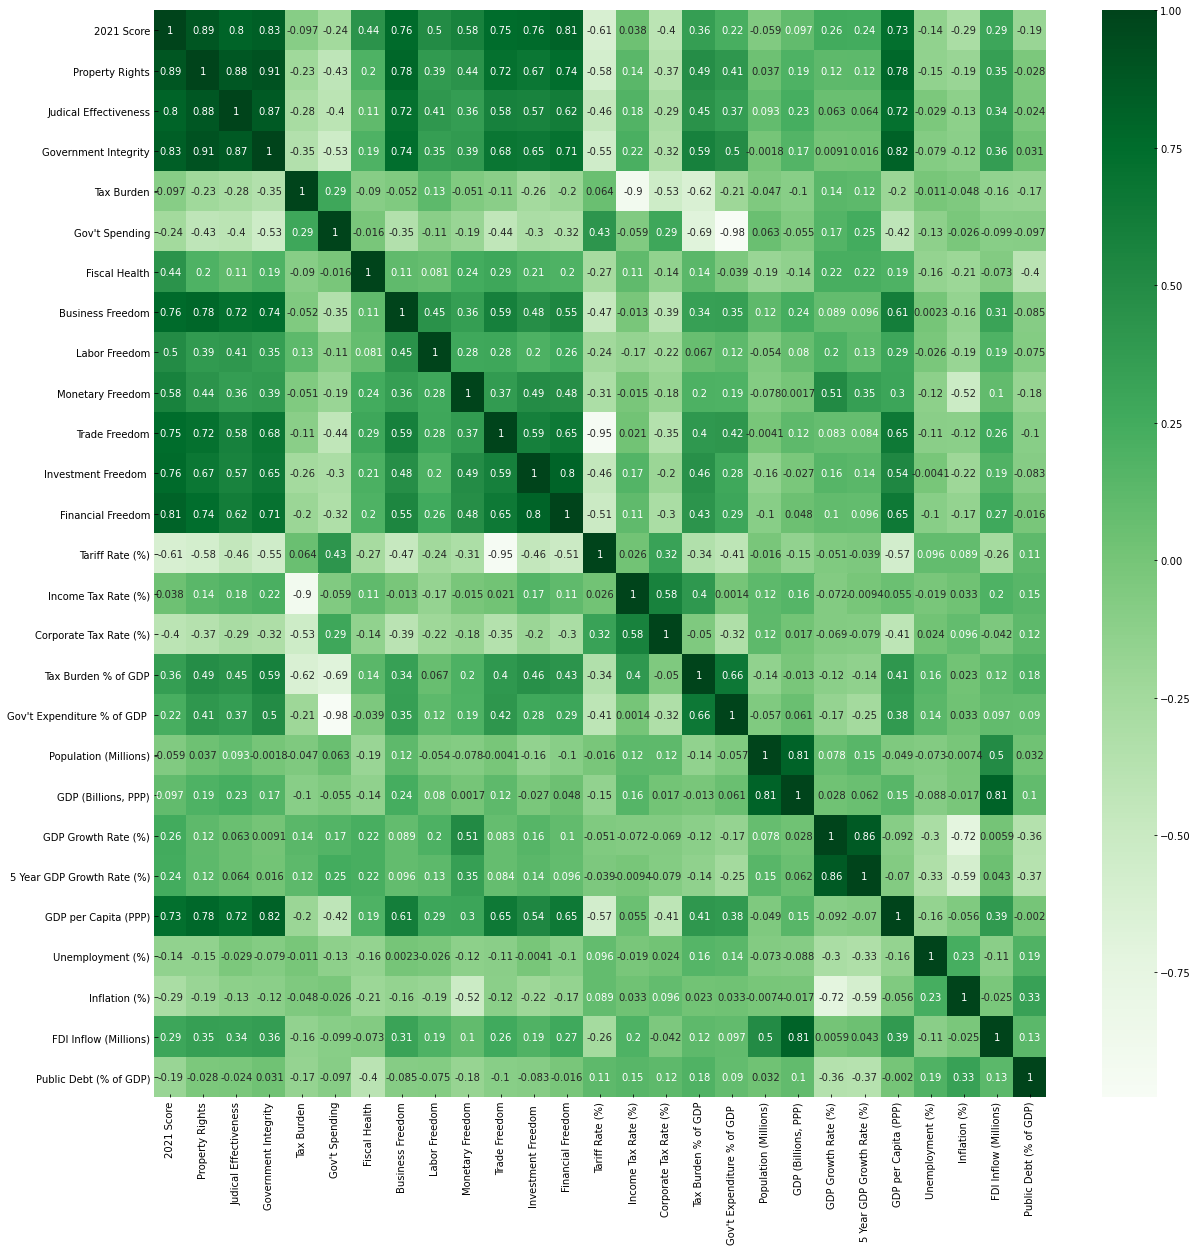

In [16]:
plt.rcParams['figure.figsize'] = [20, 20]
ax = sns.heatmap(df_num.corr(), annot=True, cmap = "Greens")

The heatmap kind of strengtens my suspricions, the dark are on the upper right might possibly be the fields that were taken into account when getting the index, no such clustering is present for anti correlated values so it leads me to the conclusion that some factors might actually be anti correlated with economic freedom.

# Slightly less superficial

In [17]:
df.columns

Index(['Country Name', 'Region', '2021 Score', 'Property Rights',
       'Judical Effectiveness', 'Government Integrity', 'Tax Burden',
       'Gov't Spending', 'Fiscal Health', 'Business Freedom', 'Labor Freedom',
       'Monetary Freedom', 'Trade Freedom', 'Investment Freedom ',
       'Financial Freedom', 'Tariff Rate (%)', 'Income Tax Rate (%)',
       'Corporate Tax Rate (%)', 'Tax Burden % of GDP',
       'Gov't Expenditure % of GDP ', 'Population (Millions)',
       'GDP (Billions, PPP)', 'GDP Growth Rate (%)',
       '5 Year GDP Growth Rate (%)', 'GDP per Capita (PPP)',
       'Unemployment (%)', 'Inflation (%)', 'FDI Inflow (Millions)',
       'Public Debt (% of GDP)'],
      dtype='object')

These fields are all over the place, I can get more insight by splitting these columns into different categories and then comparing them against each other.

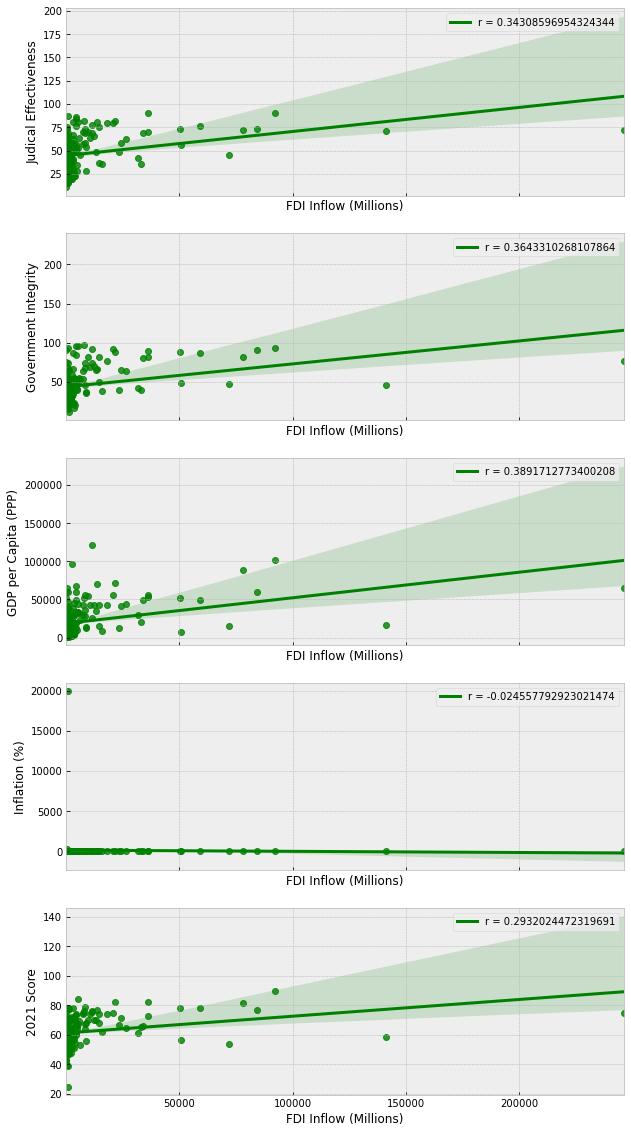

In [18]:
dfs_fdi = df.sort_values(by=['FDI Inflow (Millions)'])

fdi_list = ['Judical Effectiveness','Government Integrity',
            'GDP per Capita (PPP)','Inflation (%)','2021 Score']

f, axes = plt.subplots(len(fdi_list), 1, figsize=(10, 20), sharex=True)
plt.rc('legend', loc="upper right")
for i,v in enumerate(fdi_list):
    
    slope, intercept, r_value, p_value, std_err = stats.linregress(dfs_fdi['FDI Inflow (Millions)'],
                                                                   dfs_fdi[v])
    ax = sns.regplot(x = 'FDI Inflow (Millions)', y = v, data = dfs_fdi, color = 'g',ax = axes[i],
               line_kws = {'label':"r = {}".format(r_value)})
    ax.legend()


It's almost a meme amongst economists that FDI seeks "stability" and high returns. The stability part does seem to be true given a relatively strong correlation for factors that indicate social stability, but surprisingly enough correlation against inflation is rather weak, high interest rates?

Maybe not so surprising that even with outliers skewing the correlation negatively, FDI is linked to economic freedom.

Also might be worth looking at the 3-4 extreme outlier countries that are in the middle of the pack as far as metrics goes but have really high FDI.

In [19]:
dfs_fdi.tail()

,Country Name,Region,2021 Score,Property Rights,Judical Effectiveness,Government Integrity,Tax Burden,Gov't Spending,Fiscal Health,Business Freedom,Labor Freedom,Monetary Freedom,Trade Freedom,Investment Freedom,Financial Freedom,Tariff Rate (%),Income Tax Rate (%),Corporate Tax Rate (%),Tax Burden % of GDP,Gov't Expenditure % of GDP,Population (Millions),"GDP (Billions, PPP)",GDP Growth Rate (%),5 Year GDP Growth Rate (%),GDP per Capita (PPP),Unemployment (%),Inflation (%),FDI Inflow (Millions),Public Debt (% of GDP)
75,Ireland,Europe,81.4,86.0,72.4,82.0,76.6,81.1,93.1,81.5,76.1,84.4,84.0,90.0,70.0,3.0,41.0,12.5,22.3,25.1,4.9,417.9,5.5,10.2,88241.0,4.9,0.9,78234.1,58.6
112,Netherlands,Europe,76.8,88.9,72.8,90.6,51.7,47.7,95.3,80.5,60.1,80.4,84.0,90.0,80.0,3.0,52.0,25.0,38.8,41.7,17.3,1005.3,1.8,2.3,59687.0,3.2,2.7,84215.6,48.3
139,Singapore,Asia-Pacific,89.7,97.5,90.8,93.2,90.5,94.1,80.0,93.8,91.5,85.4,95.0,85.0,80.0,0.0,22.0,17.0,13.1,14.0,5.7,593.8,0.7,2.9,101376.0,4.1,0.6,92080.5,111.8
34,China,Asia-Pacific,58.4,62.2,71.5,46.4,72.6,67.6,54.8,80.2,64.9,69.8,71.2,20.0,20.0,4.4,45.0,25.0,9.4,32.9,1397.7,27307.0,6.1,6.7,16785.0,4.3,2.9,141225.0,54.4
165,United States,Americas,74.8,79.7,72.4,76.8,76.0,62.2,34.9,82.5,87.1,81.1,80.4,85.0,80.0,2.3,37.0,21.0,24.3,35.5,328.2,21427.7,2.3,2.4,65118.0,3.7,1.8,246215.0,109.0


US and China. We'll come back to this later

Will the hist plot have anything worth seeing?

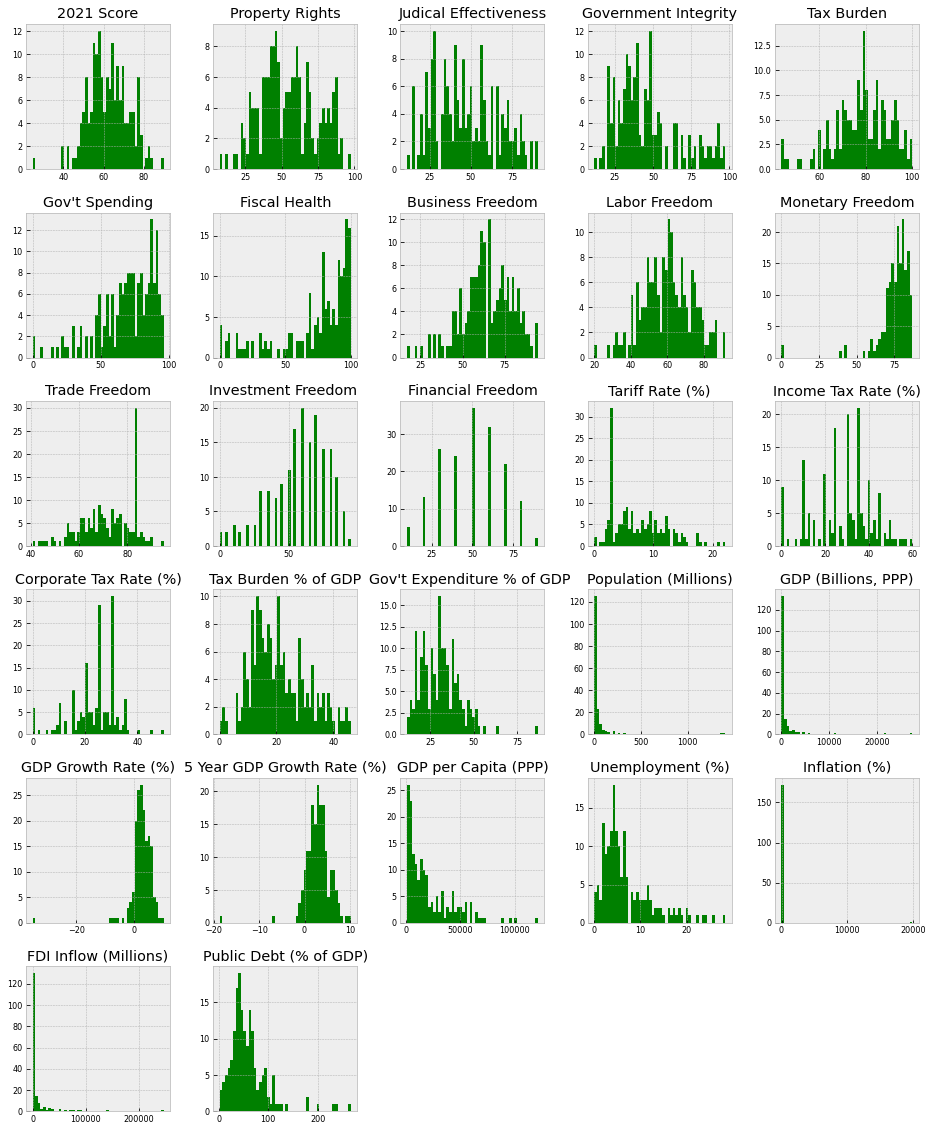

In [20]:
df_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8, color = 'g');

Nothing too crazy, some distributions are similar, but doesn't offer any more insight than what I found out in the data bias section. Scatter plots with respect to freedom index might give more insight, I only looked at the correlation, but the shape of the distribution might be worth looking at too.

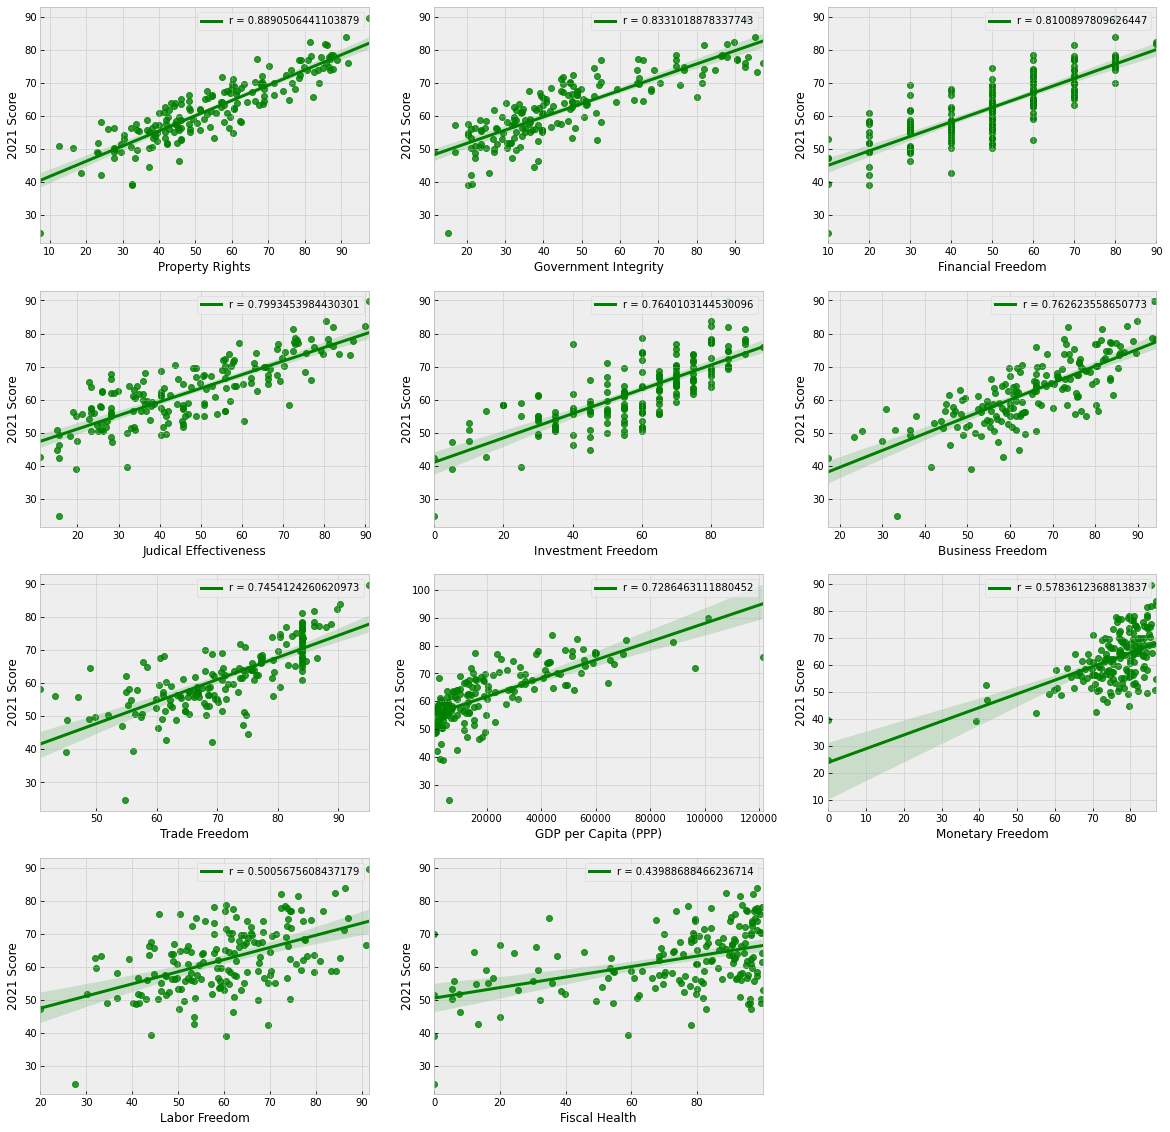

In [21]:
features_to_analyse = "Property Rights,Government Integrity,Financial Freedom,Judical Effectiveness,Investment Freedom ,Business Freedom,Trade Freedom,GDP per Capita (PPP),Monetary Freedom,Labor Freedom,Fiscal Health"
features_to_analyse_good = features_to_analyse.split(",")

a = 4  # number of rows
b = 3  # number of columns
c = 1  # initialize plot counter
plt.rc('legend', loc="upper right")
for i,v in enumerate(features_to_analyse_good):
    plt.subplot(a, b, c)
    slope, intercept, r_value, p_value, std_err = stats.linregress(df_num['2021 Score'],
                                                                   df_num[v])
    ax = sns.regplot(x = v, y = '2021 Score', data = df_num, color = 'g',
               line_kws = {'label':"r = {}".format(r_value)})
    c +=1
    ax.legend()

Some fields have a discrete patterns, not sure what the reason for this could be, the numbers were not derived from data and were filled in on the researchers whims?

In [22]:
dfs_ef # To see the countries with a high freedom index,
#Ironically enough the country with the most economic freedom is authoritarian

,Country Name,Region,2021 Score,Property Rights,Judical Effectiveness,Government Integrity,Tax Burden,Gov't Spending,Fiscal Health,Business Freedom,Labor Freedom,Monetary Freedom,Trade Freedom,Investment Freedom,Financial Freedom,Tariff Rate (%),Income Tax Rate (%),Corporate Tax Rate (%),Tax Burden % of GDP,Gov't Expenditure % of GDP,Population (Millions),"GDP (Billions, PPP)",GDP Growth Rate (%),5 Year GDP Growth Rate (%),GDP per Capita (PPP),Unemployment (%),Inflation (%),FDI Inflow (Millions),Public Debt (% of GDP)
169,Venezuela,Americas,24.7,7.5,15.4,15.1,71.1,61.5,0.0,33.4,27.5,0.0,54.8,0.0,10.0,12.6,34.00,34.0,24.0,35.8,28.5,202.0,-35.0,-18.7,5990.0,24.0,19906.0,934.000000,232.8
146,Sudan,Sub-Saharan Africa,39.1,32.6,19.7,20.2,84.9,91.9,0.0,50.8,60.4,39.2,45.0,5.0,20.0,17.5,15.00,35.0,8.0,16.4,42.8,175.2,-2.5,0.3,4123.0,16.5,51.0,825.400000,200.3
172,Zimbabwe,Sub-Saharan Africa,39.5,32.6,32.0,21.3,63.4,89.4,58.8,41.5,44.1,0.0,56.0,25.0,10.0,12.0,51.50,24.0,20.7,18.8,14.6,39.7,-8.3,0.5,2953.0,5.0,255.3,280.000000,11.0
51,Eritrea,Sub-Saharan Africa,42.3,24.2,15.4,21.0,74.0,64.3,78.1,17.3,69.6,55.0,69.2,0.0,20.0,5.4,30.00,30.0,28.2,34.5,3.5,6.6,3.8,-1.3,1710.0,5.1,-16.4,67.100000,265.8
18,Bolivia,Americas,42.7,18.7,11.0,25.9,85.3,58.4,13.4,58.4,53.4,71.0,61.6,15.0,40.0,9.2,13.00,25.0,26.0,37.3,11.5,93.4,2.8,4.1,9086.0,3.5,1.8,159.500000,57.5
154,Timor-Leste,Asia-Pacific,44.7,37.2,15.1,37.4,91.7,0.0,20.0,62.2,53.4,79.7,75.0,45.0,20.0,2.5,10.00,10.0,25.0,86.9,1.3,2.0,3.1,1.0,3253.0,4.5,0.1,74.600000,3.8
147,Suriname,Americas,46.4,45.5,15.4,38.5,70.0,68.2,7.8,45.8,61.9,73.7,60.2,40.0,30.0,12.4,38.00,36.0,16.1,32.6,0.6,9.4,2.3,-0.5,17005.0,7.3,4.4,7.200000,78.1
74,Iran,Middle East and North Africa,47.2,33.5,28.3,31.8,80.8,90.1,82.8,57.1,50.1,42.1,54.2,5.0,10.0,15.4,35.00,25.0,8.4,18.1,82.9,1491.5,-7.6,0.3,12912.0,11.4,41.1,1508.000000,29.7
160,Turkmenistan,Asia-Pacific,47.4,27.7,20.0,22.0,92.6,93.2,96.3,30.0,20.0,72.8,74.2,10.0,10.0,2.9,10.00,20.0,15.6,15.0,5.9,121.8,6.3,6.3,18200.0,3.9,5.1,2165.900000,29.5
31,Central African Republic,Sub-Saharan Africa,48.8,23.2,28.2,22.0,65.3,92.2,95.4,23.3,40.9,74.9,45.2,45.0,30.0,17.4,50.00,30.0,8.6,16.1,4.7,4.2,3.0,4.1,984.0,3.7,2.7,25.600000,47.8


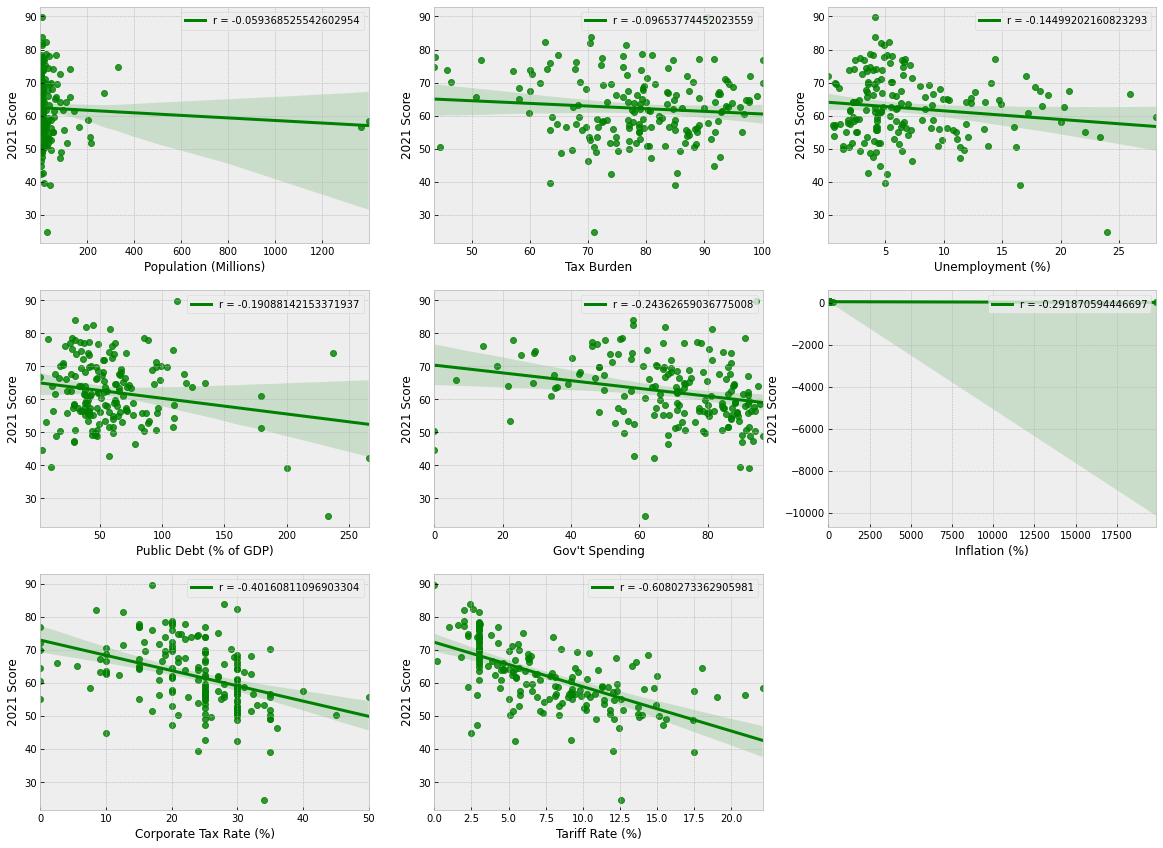

In [23]:
features_to_analyse = "Population (Millions),Tax Burden,Unemployment (%),Public Debt (% of GDP),Gov't Spending,Inflation (%),Corporate Tax Rate (%),Tariff Rate (%)"
features_to_analyse_bad = features_to_analyse.split(",")

a = 4  # number of rows
b = 3  # number of columns
c = 1  # initialize plot counter
plt.rc('legend', loc="upper right")
for i,v in enumerate(features_to_analyse_bad):
    plt.subplot(a, b, c)
    slope, intercept, r_value, p_value, std_err = stats.linregress(df_num['2021 Score'],
                                                                   df_num[v])
    ax = sns.regplot(x = v, y = '2021 Score', data = df_num, color = 'g',
               line_kws = {'label':"r = {}".format(r_value)})
    c +=1
    ax.legend()

Not much to say here

# Qualitative 

H0 = Countries with western governments would have the most economic freedom, whilst African countries would be the worst.

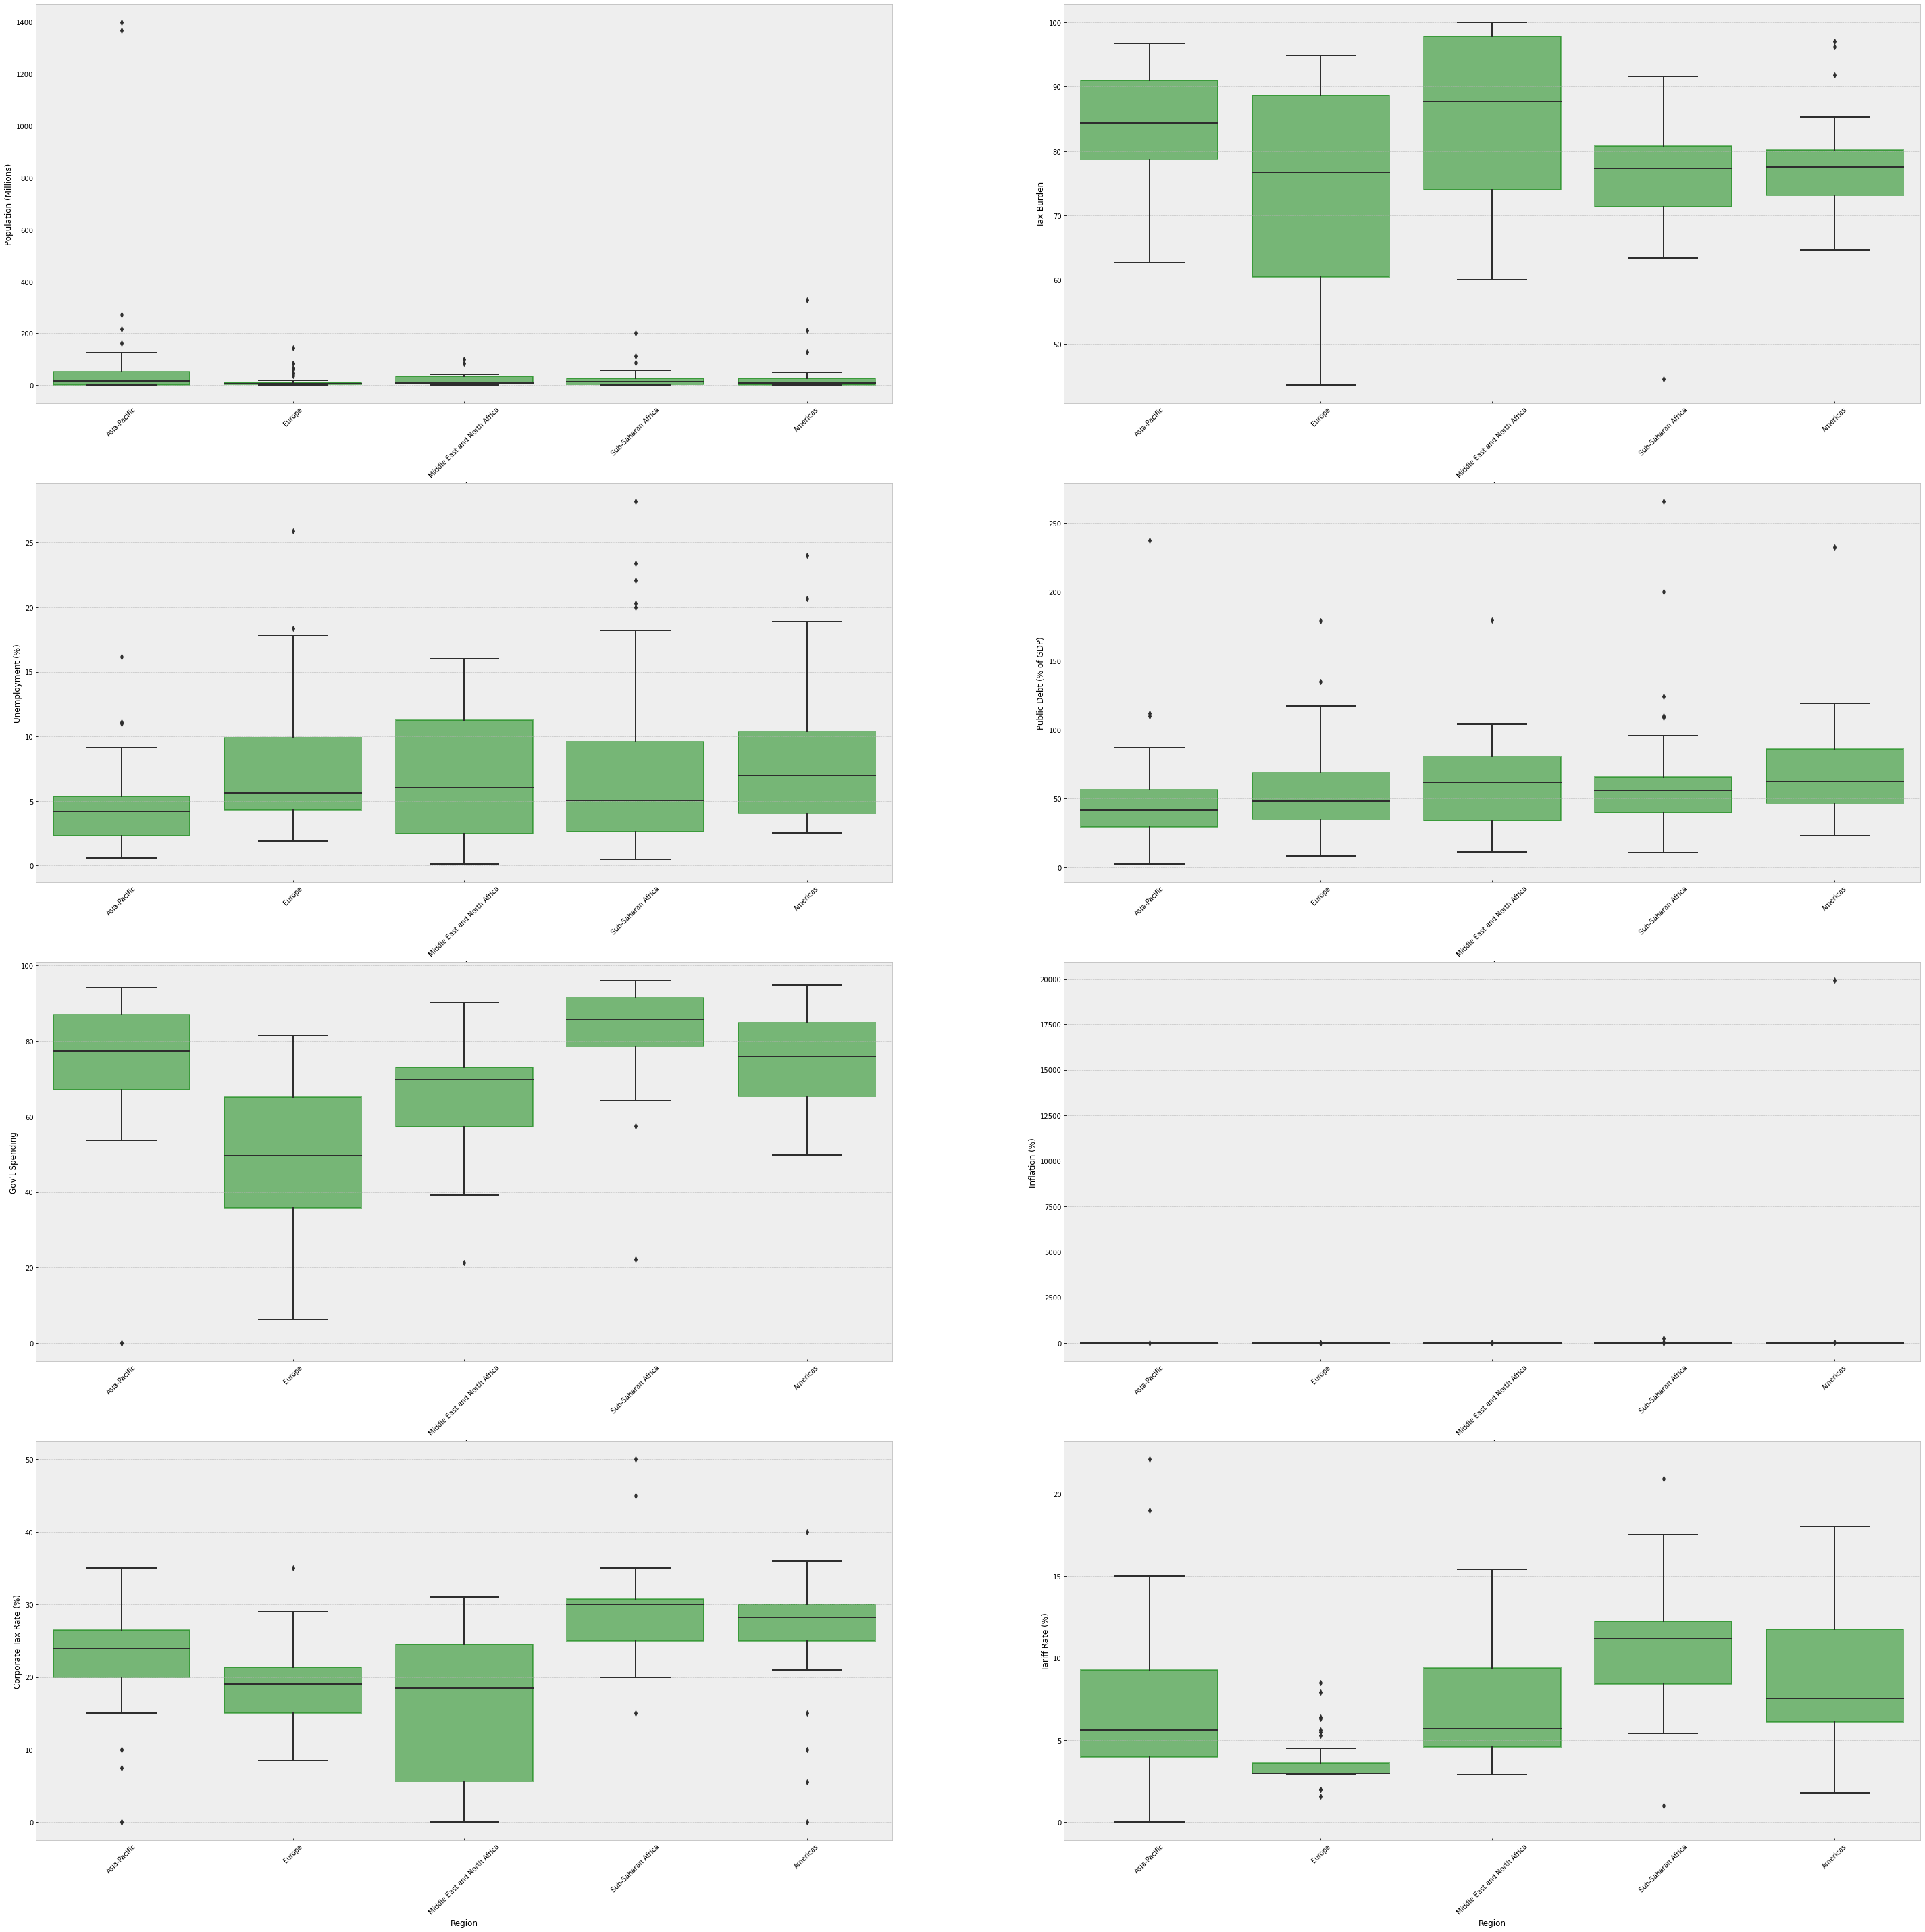

In [48]:
a = 4  # number of rows
b = 2  # number of columns
c = 1  # initialize plot counter

plt.figure(figsize = (50, 50))
for i,v in enumerate(features_to_analyse_bad):
    plt.subplot(a, b, c)
    ax = sns.boxplot(x='Region', y=v, data=df);
    plt.setp(ax.artists, alpha=.5, linewidth=2, color="g");
    plt.xticks(rotation=45)
    c +=1


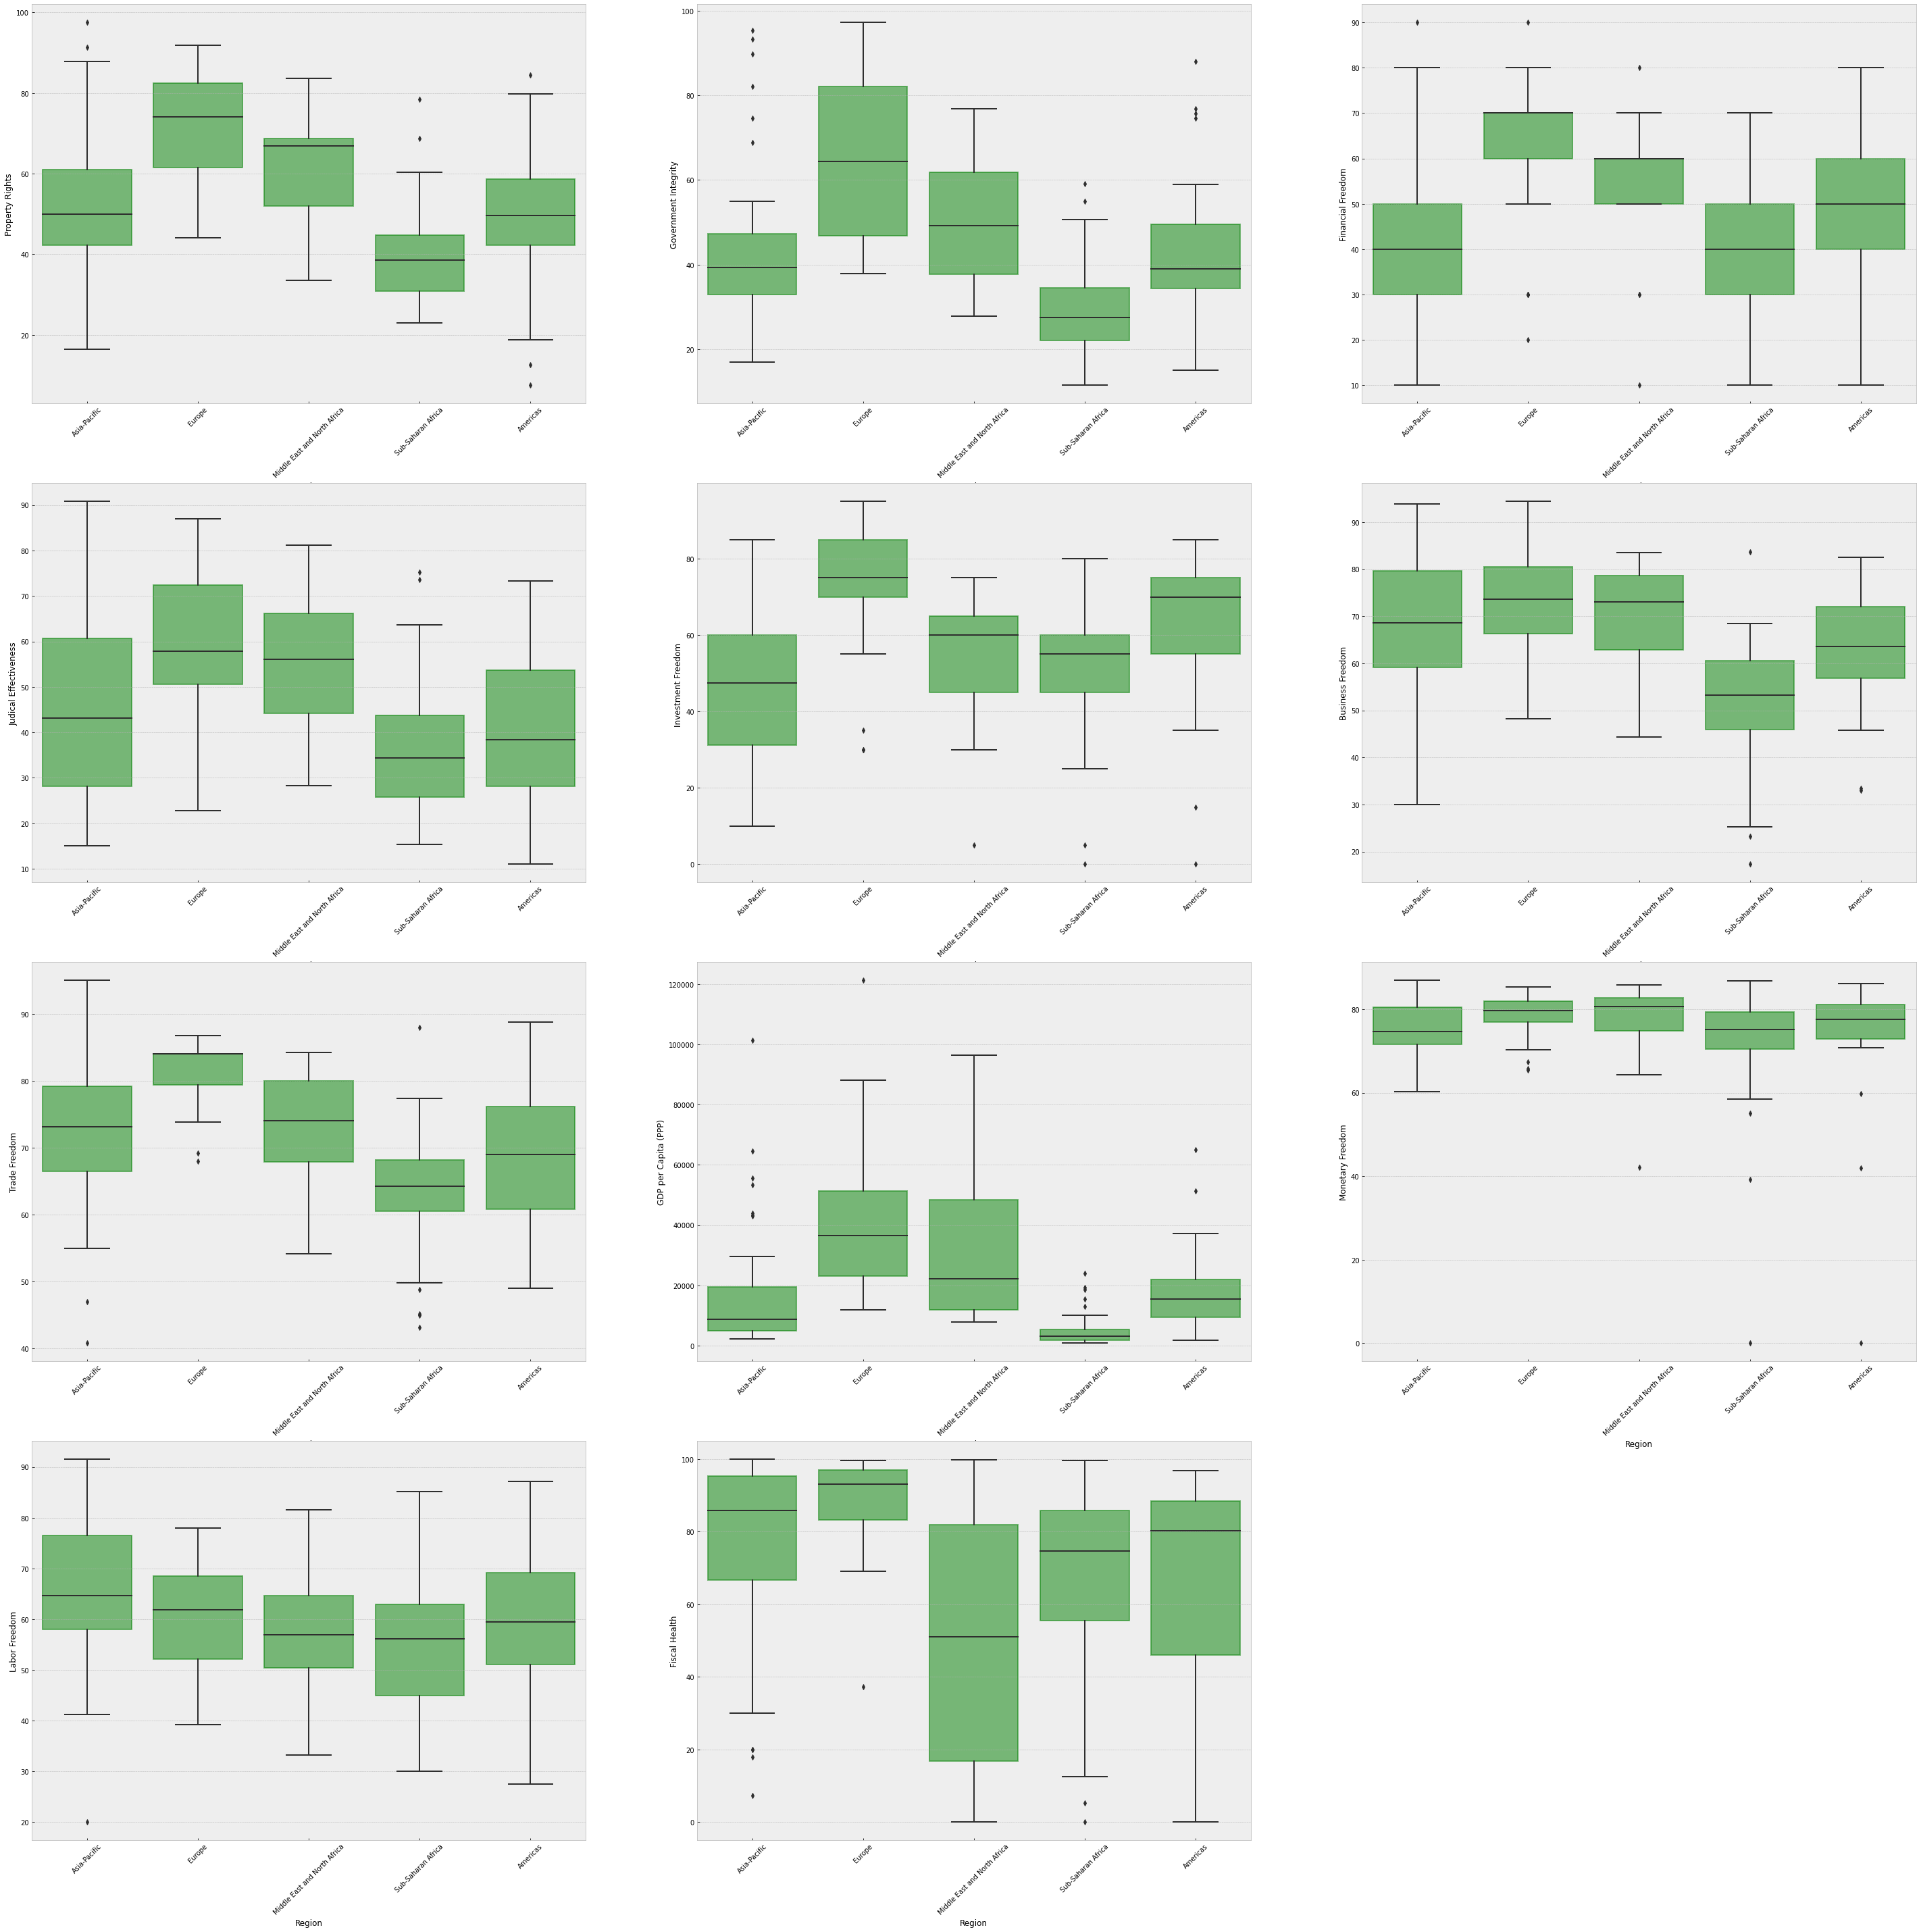

In [47]:
a = 4  # number of rows
b = 3  # number of columns
c = 1  # initialize plot counter
plt.figure(figsize = (50, 50))
for i,v in enumerate(features_to_analyse_good):

    plt.subplot(a, b, c)
    ax = sns.boxplot(x='Region', y=v, data=df);
    plt.setp(ax.artists, alpha=.5, linewidth=2, color="g");
    plt.xticks(rotation=45)
    c +=1

You can analyze the box plots yourself, but to me it looks like Europe does consistently good, Asia had a wide range, Africa is bad, and NA is mediocre. Asia has the biggest room to improve.